In [1]:
import yfinance as yf
import pandas as pd

# Question 1: Extract Tesla stock data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")

# Reset the index so Date becomes a column instead of an index
tesla_data.reset_index(inplace=True)

# Display the first five rows
print(tesla_data.head())

                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


In [2]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 29.8 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 29.0 MB/s eta 0:00:00:00:01


In [5]:
!pip install lxml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 125.5 MB/s eta 0:00:00


In [7]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from io import StringIO

# Step 1: Fetch the HTML page
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
headers = {"User-Agent": "Mozilla/5.0"}
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

# Step 2: Find all tables in the HTML
tables = soup.find_all("table")

# Step 3: Locate the Tesla Quarterly Revenue table
revenue_table = None
for table in tables:
    if "Tesla Quarterly Revenue" in str(table):
        revenue_table = table
        break

# Step 4: Parse the table into a DataFrame
if revenue_table:
    tesla_revenue = pd.read_html(StringIO(str(revenue_table)))[0]

    # Step 5: Clean up the DataFrame
    tesla_revenue.columns = ["Date", "Revenue"]
    tesla_revenue["Revenue"] = tesla_revenue["Revenue"].replace("[\$,]", "", regex=True)
    tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != ""]

    # Step 6: Display the last five rows
    print(tesla_revenue.tail())
else:
    print("❌ Tesla revenue table not found.")

          Date Revenue
59  2010-06-30      28
60  2010-03-31      21
61  2009-12-31     NaN
62  2009-09-30      46
63  2009-06-30      27


In [8]:
import yfinance as yf
import pandas as pd

# Step 1: Download GME stock data
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")

# Step 2: Reset the index so 'Date' becomes a column
gme_data.reset_index(inplace=True)

# Step 3: Display the first five rows
print(gme_data.head())

ModuleNotFoundError: No module named 'yfinance'

In [9]:
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 65.9 MB/s eta 0:00:00
  Installing build dependencies ... one
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 127.1 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.18.1-cp312-cp312-linux_x86_64.whl size=303801 sha256=e081a0470e11748dd8660f49e3c1736767aa4bdcead59f66dc140c6d90a68bb7
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/1a/57/6a/bb71346381d0d911cd4ce3026f1fa720da76707e4f01cf27dd
Successfully built peewee


In [10]:
import yfinance as yf
import pandas as pd

gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)

print(gme_data.head())

                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [11]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from io import StringIO

# Step 1: Fetch the webpage containing GME revenue data
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
headers = {"User-Agent": "Mozilla/5.0"}
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

# Step 2: Find all tables on the page
tables = soup.find_all("table")

# Step 3: Locate the GameStop Quarterly Revenue table
revenue_table = None
for table in tables:
    if "GameStop Quarterly Revenue" in str(table):
        revenue_table = table
        break

# Step 4: Parse the table into a DataFrame if found
if revenue_table:
    gme_revenue = pd.read_html(StringIO(str(revenue_table)))[0]
    gme_revenue.columns = ["Date", "Revenue"]

    # Step 5: Clean the Revenue column (remove $ and commas)
    gme_revenue["Revenue"] = gme_revenue["Revenue"].replace("[\$,]", "", regex=True)

    # Remove empty rows (if any)
    gme_revenue = gme_revenue[gme_revenue["Revenue"] != ""]

    # Step 6: Display last 5 rows
    print(gme_revenue.tail())
else:
    print("❌ GameStop revenue table not found on the page.")

          Date Revenue
61  2010-01-31    3524
62  2009-10-31    1835
63  2009-07-31    1739
64  2009-04-30    1981
65  2009-01-31    3492


In [12]:
import matplotlib.pyplot as plt

def make_graph(df, title):
    plt.figure(figsize=(12,6))
    plt.plot(df['Date'], df['Close'], label='Tesla Close Price')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.show()

# Assuming tesla_data is already defined and has columns 'Date' and 'Close'
# Example to extract Tesla data with yfinance if you don't have it:

import yfinance as yf

tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max").reset_index()

# Now plot the graph
make_graph(tesla_data, "Tesla Stock Price Over Time")

ModuleNotFoundError: No module named 'matplotlib'

In [13]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 142.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 145.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 95.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 120.2 MB/s eta 0:00:00


In [14]:
import matplotlib.pyplot as plt

def make_graph(df, title):
    plt.figure(figsize=(12,6))
    plt.plot(df['Date'], df['Close'], label='Tesla Close Price')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.show()

# Example assuming tesla_data is loaded and cleaned:
make_graph(tesla_data, "Tesla Stock Price Over Time")

NameError: name 'tesla_data' is not defined

In [15]:
!pip install yfinance matplotlib

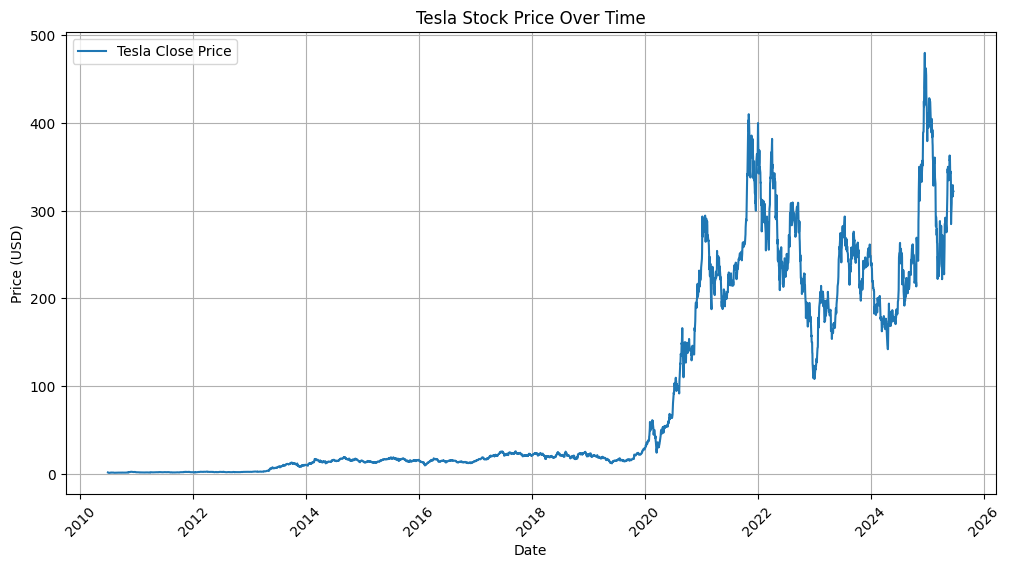

In [16]:
import yfinance as yf
import matplotlib.pyplot as plt

# Step 1: Download Tesla stock data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max").reset_index()

# Step 2: Define the plotting function
def make_graph(df, title):
    plt.figure(figsize=(12,6))
    plt.plot(df['Date'], df['Close'], label='Tesla Close Price')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.show()

# Step 3: Call the function to plot
make_graph(tesla_data, "Tesla Stock Price Over Time")

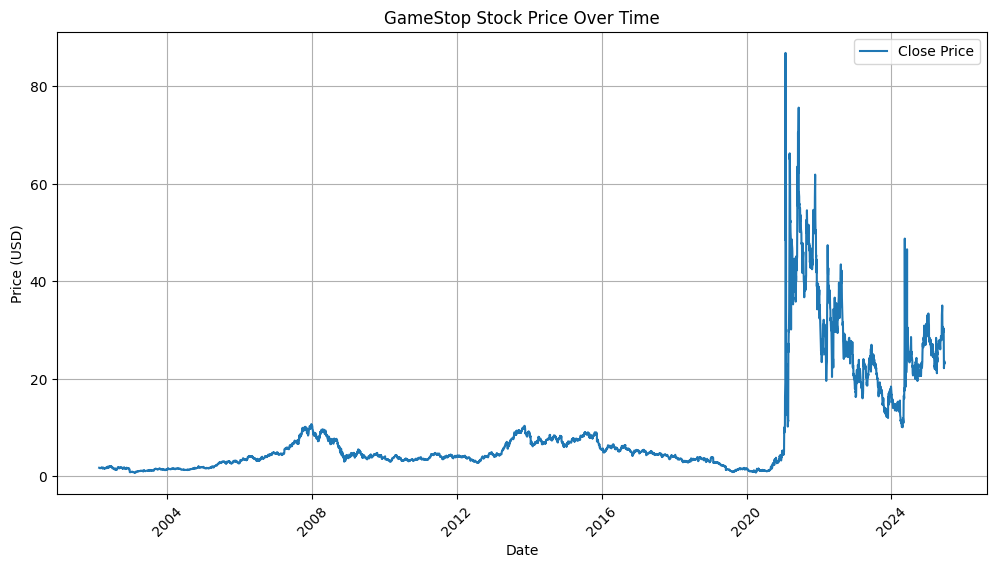

In [17]:
import yfinance as yf
import matplotlib.pyplot as plt

# Step 1: Download GameStop stock data
gme = yf.Ticker("GME")
gme_data = gme.history(period="max").reset_index()

# Step 2: Define the make_graph function (reuse from before)
def make_graph(df, title):
    plt.figure(figsize=(12,6))
    plt.plot(df['Date'], df['Close'], label='Close Price')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.show()

# Step 3: Plot the GameStop stock graph
make_graph(gme_data, "GameStop Stock Price Over Time")